# 09. PyTorch Model Deployment

Welcome to Milestone Project 3: PyTorch Model Deployment!

We've come a long way with our FoodVision Mini project.

But so far our PyTorch models have only been accessible to us.

How about we bring FoodVision Mini to life and make it publically accessible?

In other words, **we're going to deploy our FoodVision Mini model to the internet as a usable app!**

_Trying out the [deployed version of FoodVision Mini](https://huggingface.co/spaces/mrdbourke/foodvision_mini) (what we're going to build) on my lunch. The model got it right too 🍣!_


## Different types of machine learning model deployment

Whole books could be written on the different types of machine learning model deployment (and many good ones are listed in [PyTorch Extra Resources](https://www.learnpytorch.io/pytorch_extra_resources/#resources-for-machine-learning-and-deep-learning-engineering)).

And the field is still developing in terms of best practices.

But I like to start with the question:

> "What is the most ideal scenario for my machine learning model to be used?"

And then work backwards from there.

Of course, you may not know this ahead of time. But you're smart enough to imagine such things.

In the case of FoodVision Mini, our ideal scenario might be:

- Someone takes a photo on a mobile device (through an app or web broswer).
- The prediction comes back fast.

Easy.

So we've got two main criteria:

1. The model should work on a mobile device (this means there will be some compute constraints).
2. The model should make predictions _fast_ (because a slow app is a boring app).

And of course, depending on your use case, your requirements may vary.

You may notice the above two points break down into another two questions:

1. **Where's it going to go?** - As in, where is it going to be stored?
2. **How's it going to function?** - As in, does it return predictions immediately? Or do they come later?

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-deployment-questions-to-ask.png" alt="some questions to ask when starting to deploy machine learning models, what's the model ideal use case, then work backwards and ask where's my model going to go and how's my model going to function" width=900/>

_When starting to deploy machine learning models, it's helpful to start by asking what's the most ideal use case and then work backwards from there, asking where the model's going to go and then how it's going to function._


### Where's it going to go?

When you deploy your machine learning model, where does it live?

The main debate here is usually on-device (also called edge/in the browser) or on the cloud (a computer/server that isn't the _actual_ device someone/something calls the model from).

Both have their pros and cons.

| **Deployment location**             | **Pros**                                                   | **Cons**                                                                                                           |
| ----------------------------------- | ---------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------ |
| **On-device (edge/in the browser)** | Can be very fast (since no data leaves the device)         | Limited compute power (larger models take longer to run)                                                           |
|                                     | Privacy preserving (again no data has to leave the device) | Limited storage space (smaller model size required)                                                                |
|                                     | No internet connection required (sometimes)                | Device-specific skills often required                                                                              |
|                                     |                                                            |                                                                                                                    |
| **On cloud**                        | Near unlimited compute power (can scale up when needed)    | Costs can get out of hand (if proper scaling limits aren't enforced)                                               |
|                                     | Can deploy one model and use everywhere (via API)          | Predictions can be slower due to data having to leave device and predictions having to come back (network latency) |
|                                     | Links into existing cloud ecosystem                        | Data has to leave device (this may cause privacy concerns)                                                         |

There are more details to these but I've left resources in the [extra-curriculum](https://www.learnpytorch.io/09_pytorch_model_deployment/#extra-curriculum) to learn more.

Let's give an example.

If we're deploying FoodVision Mini as an app, we want it to perform well and fast.

So which model would we prefer?

1. A model on-device that performs at 95% accuracy with an inference time (latency) of one second per prediction.
2. A model on the cloud that performs at 98% accuracy with an inference time of 10 seconds per per prediction (bigger, better model but takes longer to compute).

I've made these numbers up but they showcase a potential difference between on-device and on the cloud.

Option 1 could potentially be a smaller less performant model that runs fast because its able to fit on a mobile device.

Option 2 could potentially a larger more performant model that requires more compute and storage but it takes a bit longer to run because we have to send data off the device and get it back (so even though the actual prediction might be fast, the network time and data transfer has to factored in).

For FoodVision Mini, we'd likely prefer option 1, because the small hit in performance is far outweighed by the faster inference speed.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-model-deployment-on-device-vs-cloud.png" width=900 alt="tesla computer vision system on device vs on the cloud"/>

_In the case of a Tesla car's computer vision system, which would be better? A smaller model that performs well on device (model is on the car) or a larger model that performs better that's on the cloud? In this case, you'd much prefer the model being on the car. The extra network time it would take for data to go from the car to the cloud and then back to the car just wouldn't be worth it (or potentially even impossible with poor signal areas)._

> **Note:** For a full example of seeing what it's like to deploy a PyTorch model to an edge device, see the [PyTorch tutorial on achieving real-time inference (30fps+)](https://pytorch.org/tutorials/intermediate/realtime_rpi.html) with a computer vision model on a Raspberry Pi.


### How's it going to function?

Back to the ideal use case, when you deploy your machine learning model, how should it work?

As in, would you like predictions returned immediately?

Or is it okay for them to happen later?

These two scenarios are generally referred to as:

- **Online (real-time)** - Predictions/inference happen **immediately**. For example, someone uploads an image, the image gets transformed and predictions are returned or someone makes a purchase and the transaction is verified to be non-fraudulent by a model so the purchase can go through.
- **Offline (batch)** - Predictions/inference happen **periodically**. For example, a photos application sorts your images into different categories (such as beach, mealtime, family, friends) whilst your mobile device is plugged into charge.

> **Note:** "Batch" refers to inference being performed on multiple samples at a time. However, to add a little confusion, batch processing can happen immediately/online (multiple images being classified at once) and/or offline (multiple images being predicted/trained on at once).

The main difference between each being: predictions being made immediately or periodically.

Periodically can have a varying timescale too, from every few seconds to every few hours or days.

And you can mix and match the two.

In the case of FoodVision Mini, we'd want our inference pipeline to happen online (real-time), so when someone uploads an image of pizza, steak or sushi, the prediction results are returned immediately (any slower than real-time would make a boring experience).

But for our training pipeline, it's okay for it to happen in a batch (offline) fashion, which is what we've been doing throughout the previous chapters.


### Ways to deploy a machine learning model

We've discussed a couple of options for deploying machine learning models (on-device and cloud).

And each of these will have their specific requirements:

| **Tool/resource**                                                                                                                          | **Deployment type**           |
| ------------------------------------------------------------------------------------------------------------------------------------------ | ----------------------------- |
| [Google's ML Kit](https://developers.google.com/ml-kit)                                                                                    | On-device (Android and iOS)   |
| [Apple's Core ML](https://developer.apple.com/documentation/coreml) and [`coremltools` Python package](https://coremltools.readme.io/docs) | On-device (all Apple devices) |
| [Amazon Web Service's (AWS) Sagemaker](https://aws.amazon.com/sagemaker/)                                                                  | Cloud                         |
| [Google Cloud's Vertex AI](https://cloud.google.com/vertex-ai)                                                                             | Cloud                         |
| [Microsoft's Azure Machine Learning](https://azure.microsoft.com/en-au/services/machine-learning/)                                         | Cloud                         |
| [Hugging Face Spaces](https://huggingface.co/spaces)                                                                                       | Cloud                         |
| API with [FastAPI](https://fastapi.tiangolo.com)                                                                                           | Cloud/self-hosted server      |
| API with [TorchServe](https://pytorch.org/serve/)                                                                                          | Cloud/self-hosted server      |
| [ONNX (Open Neural Network Exchange)](https://onnx.ai/index.html)                                                                          | Many/general                  |
| Many more...                                                                                                                               |                               |

> **Note:** An [application programming interface (API)](https://en.wikipedia.org/wiki/API) is a way for two (or more) computer programs to interact with each other. For example, if your model was deployed as API, you would be able to write a program that could send data to it and then receive predictions back.

Which option you choose will be highly dependent on what you're building/who you're working with.

But with so many options, it can be very intimidating.

So best to start small and keep it simple.

And one of the best ways to do so is by turning your machine learning model into a demo app with [Gradio](https://gradio.app) and then deploying it on Hugging Face Spaces.

We'll be doing just that with FoodVision Mini later on.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-tools-and-places-to-deploy-ml-models.png" alt="tools and places to deploy machine learning models" width=900/>

_A handful of places and tools to host and deploy machine learning models. There are plenty I've missed so if you'd like to add more, please leave a [discussion on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/discussions)._


## What we're going to cover

Enough talking about deploying a machine learning model.

Let's become machine learning engineers and actually deploy one.

Our goal is to deploy our FoodVision Model via a demo Gradio app with the following metrics:

1. **Performance:** 95%+ accuracy.
2. **Speed:** real-time inference of 30FPS+ (each prediction has a latency of lower than ~0.03s).

We'll start by running an experiment to compare our best two models so far: EffNetB2 and ViT feature extractors.

Then we'll deploy the one which performs closest to our goal metrics.

Finally, we'll finish with a (BIG) surprise bonus.

| **Topic**                                                            | **Contents**                                                                                                                                                                                                                                                         |
| -------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **0. Getting setup**                                                 | We've written a fair bit of useful code over the past few sections, let's download it and make sure we can use it again.                                                                                                                                             |
| **1. Get data**                                                      | Let's download the [`pizza_steak_sushi_20_percent.zip`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip) dataset so we can train our previously best performing models on the same dataset.                       |
| **2. FoodVision Mini model deployment experiment outline**           | Even on the third milestone project, we're still going to be running multiple experiments to see which model (EffNetB2 or ViT) achieves closest to our goal metrics.                                                                                                 |
| **3. Creating an EffNetB2 feature extractor**                        | An EfficientNetB2 feature extractor performed the best on our pizza, steak, sushi dataset in [07. PyTorch Experiment Tracking](https://www.learnpytorch.io/07_pytorch_experiment_tracking/), let's recreate it as a candidate for deployment.                        |
| **4. Creating a ViT feature extractor**                              | A ViT feature extractor has been the best performing model yet on our pizza, steak, sushi dataset in [08. PyTorch Paper Replicating](https://www.learnpytorch.io/08_pytorch_paper_replicating/), let's recreate it as a candidate for deployment alongside EffNetB2. |
| **5. Making predictions with our trained models and timing them**    | We've built two of the best performing models yet, let's make predictions with them and track their results.                                                                                                                                                         |
| **6. Comparing model results, prediction times and size**            | Let's compare our models to see which performs best with our goals.                                                                                                                                                                                                  |
| **7. Bringing FoodVision Mini to life by creating a Gradio demo**    | One of our models performs better than the other (in terms of our goals), so let's turn it into a working app demo!                                                                                                                                                  |
| **8. Turning our FoodVision Mini Gradio demo into a deployable app** | Our Gradio app demo works locally, let's prepare it for deployment!                                                                                                                                                                                                  |
| **9. Deploying our Gradio demo to HuggingFace Spaces**               | Let's take FoodVision Mini to the web and make it pubically accessible for all!                                                                                                                                                                                      |
| **10. Creating a BIG surprise**                                      | We've built FoodVision Mini, time to step things up a notch.                                                                                                                                                                                                         |
| **11. Deploying our BIG surprise**                                   | Deploying one app was fun, how about we make it two?                                                                                                                                                                                                                 |


## 0. Getting setup


In [8]:
import torch
import torchvision

from torch import nn
from torchvision import transforms

from torchinfo import summary

from going_modular import GPU_check, data_setup, engine, helper_functions

device = GPU_check.GPU_check()

CUDA available: True
CUDA devices: 1
Current device: 0
Device name: NVIDIA GeForce RTX 3060 Laptop GPU


In [9]:
torch.__version__, torchvision.__version__

('2.7.1+cu126', '0.22.1+cu126')

## 1. Getting data


In [10]:
# Download pizza, steak, sushi images from GitHub
data_20_percent_path = helper_functions.download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                                            destination="pizza_steak_sushi_20_percent")

data_20_percent_path

[INFO] data\pizza_steak_sushi_20_percent directory exists, skipping download.


WindowsPath('data/pizza_steak_sushi_20_percent')

In [11]:
TRAIN_DIR = data_20_percent_path / "train"
TEST_DIR = data_20_percent_path / "test"

TRAIN_DIR, TEST_DIR

(WindowsPath('data/pizza_steak_sushi_20_percent/train'),
 WindowsPath('data/pizza_steak_sushi_20_percent/test'))

## 2. FoodVision Mini model deployment experiment outline

The ideal deployed model FoodVision Mini performs well and fast.

We'd like our model to perform as close to real-time as possible.

Real-time in this case being ~30FPS (frames per second) because that's [about how fast the human eye can see](https://www.healthline.com/health/human-eye-fps) (there is debate on this but let's just use ~30FPS as our benchmark).

And for classifying three different classes (pizza, steak and sushi), we'd like a model that performs at 95%+ accuracy.

Of course, higher accuracy would be nice but this might sacrifice speed.

So our goals are:

1. **Performance** - A model that performs at 95%+ accuracy.
2. **Speed** - A model that can classify an image at ~30FPS (0.03 seconds inference time per image, also known as latency).

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-model-deployments-speed-vs-inference.png" alt="foodvision mini goals in terms of performance and inference time." width=750/>

_FoodVision Mini deployment goals. We'd like a fast predicting well-performing model (because a slow app is boring)._

We'll put an emphasis on speed, meaning, we'd prefer a model performing at 90%+ accuracy at ~30FPS than a model performing 95%+ accuracy at 10FPS.

To try and achieve these results, let's bring in our best performing models from the previous sections:

1. **EffNetB2 feature extractor** (EffNetB2 for short) - originally created in [07. PyTorch Experiment Tracking section 7.5](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#75-create-feature-extractor-models) using [`torchvision.models.efficientnet_b2()`](https://pytorch.org/vision/stable/models/generated/torchvision.models.efficientnet_b2.html#efficientnet-b2) with adjusted `classifier` layers.
2. **ViT-B/16 feature extractor** (ViT for short) - originally created in [08. PyTorch Paper Replicating section 10](https://www.learnpytorch.io/08_pytorch_paper_replicating/#10-using-a-pretrained-vit-from-torchvisionmodels-on-the-same-dataset) using [`torchvision.models.vit_b_16()`](https://pytorch.org/vision/stable/models/generated/torchvision.models.vit_b_16.html#vit-b-16) with adjusted `head` layers.
   - **Note** ViT-B/16 stands for "Vision Transformer Base, patch size 16".

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-model-deployment-two-experiments.png" alt="modelling experiments for foodvision mini deployments, one effnetb2 feature extractor model and a vision transformer feature extractor model" width=750 />

> **Note:** A "feature extractor model" often starts with a model that has been pretrained on a dataset similar to your own problem. The pretrained model's base layers are often left frozen (the pretrained patterns/weights stay the same) whilst some of the top (or classifier/classification head) layers get customized to your own problem by training on your own data. We covered the concept of a feature extractor model in [06. PyTorch Transfer Learning section 3.4](https://www.learnpytorch.io/06_pytorch_transfer_learning/#34-freezing-the-base-model-and-changing-the-output-layer-to-suit-our-needs).


## 3. Creating an EffNetB2 feature extractor

We first created an EffNetB2 feature extractor model in [07. PyTorch Experiment Tracking section 7.5](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#75-create-feature-extractor-models).

And by the end of that section we saw it performed very well.

So let's now recreate it here so we can compare its results to a ViT feature extractor trained on the same data.

To do so we can:

1. Setup the pretrained weights as [`weights=torchvision.models.EfficientNet_B2_Weights.DEFAULT`](https://pytorch.org/vision/stable/models/generated/torchvision.models.efficientnet_b2.html#torchvision.models.EfficientNet_B2_Weights), where "`DEFAULT`" means "best currently available" (or could use `weights="DEFAULT"`).
2. Get the pretrained model image transforms from the weights with the `transforms()` method (we need these so we can convert our images into the same format as the pretrained EffNetB2 was trained on).
3. Create a pretrained model instance by passing the weights to an instance of [`torchvision.models.efficientnet_b2`](https://pytorch.org/vision/stable/models/generated/torchvision.models.efficientnet_b2.html#efficientnet-b2).
4. Freeze the base layers in the model.
5. Update the classifier head to suit our own data.


In [6]:
# 1. Setup pretrained EffNetB2 weights
effnetb2_weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT

# 2. Get EffNetB2 transforms
effnetb2_transforms = effnetb2_weights.transforms()

# 3. Setup pretrained model
effnetb2 = torchvision.models.efficientnet_b2(weights="DEFAULT") # could also use weights="DEFAULT"

# 4. Freeze the base layers in the model (this will freeze all layers to begin with)
for param in effnetb2.parameters():
    param.requires_grad = False

In [7]:
effnetb2.classifier

Sequential(
  (0): Dropout(p=0.3, inplace=True)
  (1): Linear(in_features=1408, out_features=1000, bias=True)
)

In [8]:
effnetb2.classifier = nn.Sequential(
    nn.Dropout(p=0.3, inplace=True),
    nn.Linear(in_features=1408, out_features=3, bias=True)
)


### 3.1 Creating a function to make an EffNetB2 feature extractor

Looks like our EffNetB2 feature extractor is ready to go, however, since there's quite a few steps involved here, how about we turn the code above into a function we can re-use later?

We'll call it `create_effnetb2_model()` and it'll take a customizable number of classes and a random seed parameter for reproducibility.

Ideally, it will return an EffNetB2 feature extractor along with its associated transforms.


In [12]:
def create_effnetb2_model(num_classes: int=3,
                        seed: int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head. 
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model. 
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # 1, 2, 3. Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    # 4. Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False
        
    torch.manual_seed(seed)
    
    # 5. Change classifier head with random seed for reproducibility
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes, bias=True)
    )
    
    return model, transforms

In [13]:
effnetb2, effnetb2_transforms = create_effnetb2_model()

effnetb2.load_state_dict(torch.load("models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth"))

<All keys matched successfully>

In [11]:
from torchinfo import summary

# Print EffNetB2 model summary (uncomment for full output) 
summary(effnetb2, 
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 3]               --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1408, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

### 3.2 Creating DataLoaders for EffNetB2

Our EffNetB2 feature extractor is ready, time to create some `DataLoader`s.

We can do this by using the [`data_setup.create_dataloaders()`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/data_setup.py) function we created in [05. PyTorch Going Modular section 2](https://www.learnpytorch.io/05_pytorch_going_modular/#2-create-datasets-and-dataloaders-data_setuppy).

We'll use a `batch_size` of 32 and transform our images using the `effnetb2_transforms` so they're in the same format that our `effnetb2` model was trained on.


In [12]:
from going_modular import data_setup

train_loader, test_loader, class_names = data_setup.create_dataloader(train_dir=TRAIN_DIR,
                                                                    test_dir=TEST_DIR,
                                                                    transform= effnetb2_transforms,
                                                                    batch_size=32,)

train_loader, test_loader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x20aa381c0a0>,
 ['pizza', 'steak', 'sushi'])

### 3.3 Training EffNetB2 feature extractor

Model ready, `DataLoader`s ready, let's train!

Just like in [07. PyTorch Experiment Tracking section 7.6](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#76-create-experiments-and-set-up-training-code), ten epochs should be enough to get good results.

We can do so by creating an optimizer (we'll use [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam) with a learning rate of `1e-3`), a loss function (we'll use [`torch.nn.CrossEntropyLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) for multi-class classification) and then passing these as well as our `DataLoader`s to the [`engine.train()`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/engine.py) function we created in [05. PyTorch Going Modular section 4](https://www.learnpytorch.io/05_pytorch_going_modular/#4-creating-train_step-and-test_step-functions-and-train-to-combine-them).


In [13]:
from going_modular import engine

optimizer = torch.optim.Adam(params=effnetb2.parameters(),
                            lr = 1e-3)

loss_fn = nn.CrossEntropyLoss()

effnetb2_results = engine.train(model= effnetb2,
                                train_dataloader= train_loader,
                                test_dataloader= test_loader,
                                optimizer= optimizer,
                                loss_fn= loss_fn,
                                epochs = 10,
                                device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Looked at 0/450 samples
Looked at 64/450 samples
Looked at 128/450 samples
Looked at 192/450 samples
Looked at 256/450 samples
Looked at 320/450 samples
Looked at 384/450 samples
Looked at 28/450 samples


Train loss: 0.96962 | Train accuracy: 53.33%
Test loss: 0.72201 | Test accuracy: 94.67%


Looked at 0/450 samples
Looked at 64/450 samples
Looked at 128/450 samples
Looked at 192/450 samples
Looked at 256/450 samples
Looked at 320/450 samples
Looked at 384/450 samples
Looked at 28/450 samples


Train loss: 0.70825 | Train accuracy: 86.22%
Test loss: 0.56852 | Test accuracy: 94.67%


Looked at 0/450 samples
Looked at 64/450 samples
Looked at 128/450 samples
Looked at 192/450 samples
Looked at 256/450 samples
Looked at 320/450 samples
Looked at 384/450 samples
Looked at 28/450 samples


Train loss: 0.55826 | Train accuracy: 86.67%
Test loss: 0.48725 | Test accuracy: 92.67%


Looked at 0/450 samples
Looked at 64/450 samples
Looked at 128/450 samples
Looked at 192/450 samples
Looked at 2

### 3.4 Inspecting EffNetB2 loss curves

Nice!

As we saw in 07. PyTorch Experiment Tracking, the EffNetB2 feature extractor model works quite well on our data.

Let's turn its results into loss curves to inspect them further.

> **Note:** Loss curves are one of the best ways to visualize how your model's performing. For more on loss curves, check out [04. PyTorch Custom Datasets section 8: What should an ideal loss curve look like?](https://www.learnpytorch.io/04_pytorch_custom_datasets/#8-what-should-an-ideal-loss-curve-look-like)


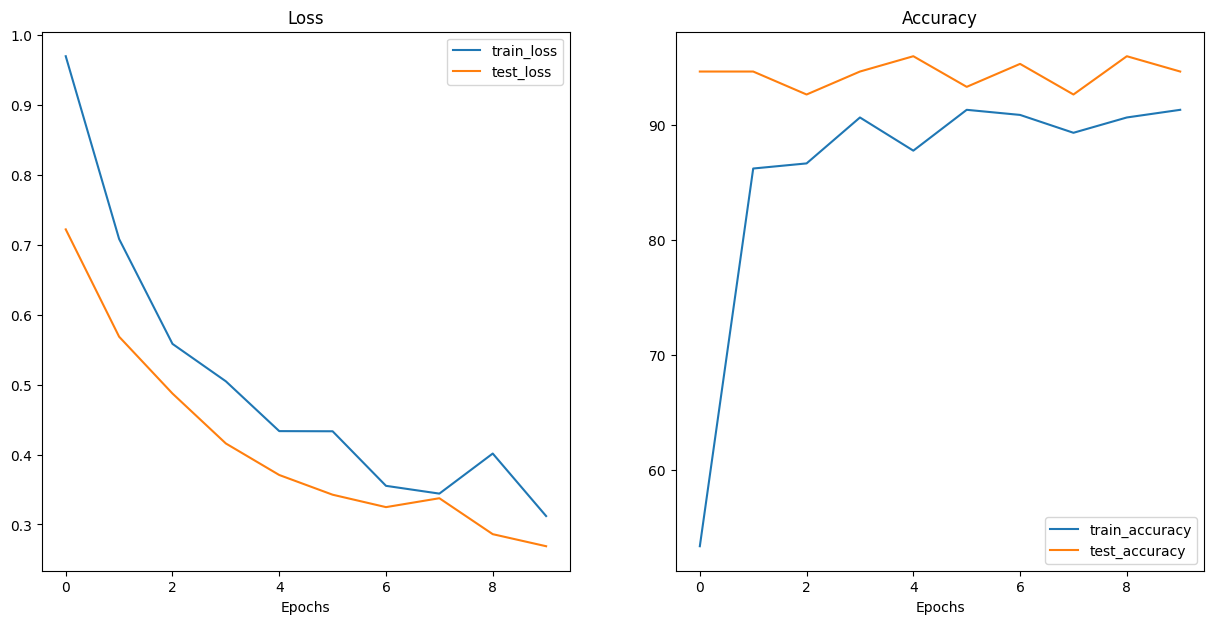

In [14]:
from going_modular.helper_functions import plot_loss_curves

plot_loss_curves(effnetb2_results)

### 3.5 Saving EffNetB2 feature extractor

Now we've got a well-performing trained model, let's save it to file so we can import and use it later.

To save our model we can use the [`utils.save_model()`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/utils.py) function we created in [05. PyTorch Going Modular section 5](https://www.learnpytorch.io/05_pytorch_going_modular/#5-creating-a-function-to-save-the-model-utilspy).

We'll set the `target_dir` to `"models"` and the `model_name` to `"09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth"` (a little comprehensive but at least we know what's going on).


In [15]:
from going_modular.utils import save_model

save_model(model= effnetb2, target_dir= "models", model_name="09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth")

[INFO] ✅ Model saved to: models\09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth


### 3.6 Checking the size of EffNetB2 feature extractor

Since one of our criteria for deploying a model to power FoodVision Mini is **speed** (~30FPS or better), let's check the size of our model.

Why check the size?

Well, while not always the case, the size of a model can influence its inference speed.

As in, if a model has more parameters, it generally performs more operations and each one of these operations requires some computing power.

And because we'd like our model to work on devices with limited computing power (e.g. on a mobile device or in a web browser), generally, the smaller the size the better (as long as it still performs well in terms of accuracy).

To check our model's size in bytes, we can use Python's [`pathlib.Path.stat("path_to_model").st_size`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.stat) and then we can convert it (roughly) to megabytes by dividing it by `(1024*1024)`.


In [16]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_effnetb2_model_size = Path("models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly) 
print(f"Pretrained EffNetB2 feature extractor model size: {pretrained_effnetb2_model_size} MB")


Pretrained EffNetB2 feature extractor model size: 29 MB


### 3.7 Collecting EffNetB2 feature extractor stats

We've got a few statistics about our EffNetB2 feature extractor model such as test loss, test accuracy and model size, how about we collect them all in a dictionary so we can compare them to the upcoming ViT feature extractor.

And we'll calculate an extra one for fun, total number of parameters.

We can do so by counting the number of elements (or patterns/weights) in `effnetb2.parameters()`. We'll access the number of elements in each parameter using the [`torch.numel()`](https://pytorch.org/docs/stable/generated/torch.numel.html) (short for "number of elements") method.


In [17]:
effnetb2_total_params = sum(torch.numel(param) for param in effnetb2.parameters())
effnetb2_total_params

7705221

In [19]:
# Create a dictionary with EffNetB2 statistics
effnetb2_stats = {"test_loss": round(effnetb2_results["test_loss"][-1], 2),
                    "test_acc": round(effnetb2_results["test_acc"][-1], 2),
                    "number_of_parameters": effnetb2_total_params,
                    "model_size (MB)": pretrained_effnetb2_model_size}
effnetb2_stats

{'test_loss': 0.27,
 'test_acc': 94.67,
 'number_of_parameters': 7705221,
 'model_size (MB)': 29}

## 4. Creating a ViT feature extractor

Time to continue with our FoodVision Mini modelling experiments.

This time we're going to create a ViT feature extractor.

And we'll do it in much the same way as the EffNetB2 feature extractor except this time with [`torchvision.models.vit_b_16()`](https://pytorch.org/vision/stable/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16) instead of `torchvision.models.efficientnet_b2()`.

We'll start by creating a function called `create_vit_model()` which will be very similar to `create_effnetb2_model()` except of course returning a ViT feature extractor model and transforms rather than EffNetB2.

Another slight difference is that `torchvision.models.vit_b_16()`'s output layer is called `heads` rather than `classifier`.


In [7]:
vit = torchvision.models.vit_b_16()
vit.heads

Sequential(
  (head): Linear(in_features=768, out_features=1000, bias=True)
)

In [15]:
import torchvision
from torch import nn

def create_vit_model(num_classes: int=3,
                    seed: int = 42):
    """Creates a ViT-B/16 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of target classes. Defaults to 3.
        seed (int, optional): random seed value for output layer. Defaults to 42.

    Returns:
        model (torch.nn.Module): ViT-B/16 feature extractor model. 
        transforms (torchvision.transforms): ViT-B/16 image transforms.
    """
    # Create ViT_B_16 pretrained weights, transforms and model
    weights = torchvision.models.ViT_B_16_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.vit_b_16(weights = "DEFAULT")
    
    for param in model.parameters():
        param.requires_grad = False
        
    model.heads = nn.Linear(in_features=768, out_features=num_classes, bias=True)
    
    return model, transforms

In [ ]:
import torch

vit, vit_transforms = create_vit_model()
vit.load_state_dict(torch.load("models/09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth"))

In [17]:
from torchinfo import summary

# Print ViT feature extractor model summary (uncomment for full output)
summary(vit, 
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]     [1, 3]               768                  Partial
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]     [1, 768, 14, 14]     (590,592)            False
├─Encoder (encoder)                                          [1, 197, 768]        [1, 197, 768]        151,296              False
│    └─Dropout (dropout)                                     [1, 197, 768]        [1, 197, 768]        --                   --
│    └─Sequential (layers)                                   [1, 197, 768]        [1, 197, 768]        --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]        [1, 197, 768]        (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]        [1, 1

### 4.1 Create DataLoaders for ViT

We've got our ViT model ready, now let's create some `DataLoader`s for it.

We'll do this in the same way we did for EffNetB2 except we'll use `vit_transforms` to transform our images into the same format the ViT model was trained on.


In [18]:
from going_modular.data_setup import create_dataloader

train_loader_vit, test_loader_vit, class_names = create_dataloader(train_dir=TRAIN_DIR,
                                                            test_dir= TEST_DIR,
                                                            transform= vit_transforms,
                                                            batch_size=32)

train_loader_vit, test_loader_vit, class_names

(<torch.utils.data.dataloader.DataLoader at 0x2061b9cb310>,
 ['pizza', 'steak', 'sushi'])

### 4.2 Training ViT feature extractor

You know what time it is...

...it's traininggggggg time (sung in the same tune as the song [Closing Time](https://youtu.be/xGytDsqkQY8)).

Let's train our ViT feature extractor model for 10 epochs using our `engine.train()` function with `torch.optim.Adam()` and a learning rate of `1e-3` as our optimizer and `torch.nn.CrossEntropyLoss()` as our loss function.

We'll use our `set_seeds()` function before training to try and make our results as reproducible as possible.


In [19]:
from going_modular.engine import train

optimizer = torch.optim.Adam(params=vit.parameters(),
                                lr = 1e-3)

loss_fn = nn.CrossEntropyLoss()

vit_results = train(model=vit,
                    train_dataloader=train_loader_vit,
                    test_dataloader=test_loader_vit,
                    optimizer=optimizer,
                    loss_fn=loss_fn,
                    device=device,
                    epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Looked at 0/450 samples
Looked at 64/450 samples
Looked at 128/450 samples
Looked at 192/450 samples
Looked at 256/450 samples
Looked at 320/450 samples
Looked at 384/450 samples
Looked at 28/450 samples


Train loss: 0.52932 | Train accuracy: 83.56%
Test loss: 0.20319 | Test accuracy: 97.33%


Looked at 0/450 samples
Looked at 64/450 samples
Looked at 128/450 samples
Looked at 192/450 samples
Looked at 256/450 samples
Looked at 320/450 samples
Looked at 384/450 samples
Looked at 28/450 samples


Train loss: 0.22708 | Train accuracy: 94.22%
Test loss: 0.11029 | Test accuracy: 98.67%


Looked at 0/450 samples
Looked at 64/450 samples
Looked at 128/450 samples
Looked at 192/450 samples
Looked at 256/450 samples
Looked at 320/450 samples
Looked at 384/450 samples
Looked at 28/450 samples


Train loss: 0.14095 | Train accuracy: 95.56%
Test loss: 0.09547 | Test accuracy: 99.33%


Looked at 0/450 samples
Looked at 64/450 samples
Looked at 128/450 samples
Looked at 192/450 samples
Looked at 2

### 4.3 Inspecting ViT loss curves

Alright, alright, alright, ViT model trained, let's get visual and see some loss curves.

> **Note:** Don't forget you can see what an ideal set of loss curves should look like in [04. PyTorch Custom Datasets section 8](https://www.learnpytorch.io/04_pytorch_custom_datasets/#8-what-should-an-ideal-loss-curve-look-like).


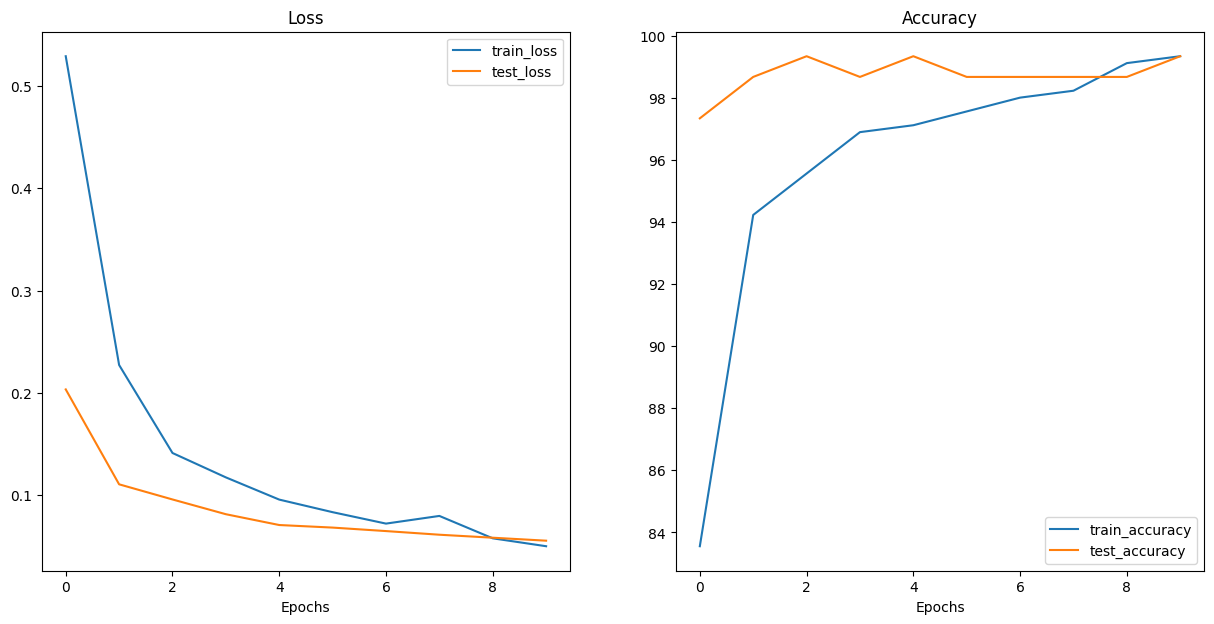

In [20]:
from going_modular.helper_functions import plot_loss_curves

plot_loss_curves(vit_results)

### 4.4 Saving ViT feature extractor

Our ViT model is performing outstanding!

So let's save it to file so we can import it and use it later if we wish.

We can do so using the `utils.save_model()` function we created in [05. PyTorch Going Modular section 5](https://www.learnpytorch.io/05_pytorch_going_modular/#5-creating-a-function-to-save-the-model-utilspy).


In [21]:
# Save the model
from going_modular.utils import save_model

save_model(model=vit,
            target_dir="models",
            model_name="09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth")

[INFO] ✅ Model saved to: models\09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth


### 4.5 Checking the size of ViT feature extractor

And since we want to compare our EffNetB2 model to our ViT model across a number of characteristics, let's find out its size.

To check our model's size in bytes, we can use Python's `pathlib.Path.stat("path_to_model").st_size` and then we can convert it (roughly) to megabytes by dividing it by `(1024*1024)`.


In [22]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_vit_model_size = Path("models/09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly) 
print(f"Pretrained ViT feature extractor model size: {pretrained_vit_model_size} MB")

Pretrained ViT feature extractor model size: 327 MB


### 4.6 Collecting ViT feature extractor stats

Let's put together all of our ViT feature extractor model statistics.

We saw it in the summary output above but we'll calculate its total number of parameters.


In [23]:
# Count number of parameters in ViT
vit_total_params = sum(torch.numel(param) for param in vit.parameters())
vit_total_params

85800963

In [24]:
# Create ViT statistics dictionary
vit_stats = {"test_loss": vit_results["test_loss"][-1],
            "test_acc": vit_results["test_acc"][-1],
            "number_of_parameters": vit_total_params,
            "model_size (MB)": pretrained_vit_model_size}

vit_stats

{'test_loss': 0.05511614754796028,
 'test_acc': 99.33333396911621,
 'number_of_parameters': 85800963,
 'model_size (MB)': 327}

Woah, that looks like a fair bit more than our EffNetB2!

> **Note:** A larger number of parameters (or weights/patterns) generally means a model has a higher _capacity_ to learn, whether it actually uses this extra capacity is another story. In light of this, our EffNetB2 model has 7,705,221 parameters where as our ViT model has 85,800,963 (11.1x more) so we could assume that our ViT model has more of a capacity to learn, if given more data (more opportunities to learn). However, this larger capacity to learn ofen comes with an increased model filesize and a longer time to perform inference.

Now let's create a dictionary with some important characteristics of our ViT model.


## 5. Making predictions with our trained models and timing them

We've got a couple of trained models, both performing pretty well.

Now how about we test them out doing what we'd like them to do?

As in, let's see how they go making predictions (performing inference).

We know both of our models are performing at over 95% accuracy on the test dataset, but how fast are they?

Ideally, if we're deploying our FoodVision Mini model to a mobile device so people can take photos of their food and identify it, we'd like the predictions to happen at real-time (~30 frames per second).

That's why our second criteria is: a fast model.

To find out how long each of our models take to performance inference, let's create a function called `pred_and_store()` to iterate over each of the test dataset images one by one and perform a prediction.

We'll time each of the predictions as well as store the results in a common prediction format: a list of dictionaries (where each element in the list is a single prediction and each sinlge prediction is a dictionary).

> **Note:** We time the predictions one by one rather than by batch because when our model is deployed, it will likely only be making a prediction on one image at a time. As in, someone takes a photo and our model predicts on that single image.

Since we'd like to make predictions across all the images in the test set, let's first get a list of all of the test image paths so we can iterate over them.

To do so, we'll use Python's [`pathlib.Path("target_dir").glob("*/*.jpg"))`](https://docs.python.org/3/library/pathlib.html#basic-use) to find all of the filepaths in a target directory with the extension `.jpg` (all of our test images).
